## k-NN

Dette dokument indeholder nogle implementationer af k-NN modellen med nogle tilhørende opgaver. Formålet er at give en intuition for hvordan modellen virker, så man har et eksempel på en klassisk machine learning model.

Det anbefales at bruge kapitlet om k-NN modellen fra kompendiet som opslagsværk til at forstå modellen på konceptplan, mens man forsøger at løse opgavere.

In [1]:
# Her er blot en celle til at importere pakker, før alt det andet kode bliver kørt
import numpy as np
import matplotlib.pyplot as plt
import math

#### Opgave 0

Dette er en ekstraopgave fra intro til programmering, som er et meget fint, men ikke nødvendigt udgangspunkt for resten af opgaverne her.

Opgave 0.1: Løs opgaven 12 på CodeJudge kaldet k nærmeste naboer.

#### Opgave 1 (svær)

Den første opgaver er at bygge sin egen implementation af k-NN modellen fra bunden af. Her kan man benytte sig af skelettet af kommentarer i nedenstående celle. Denne opgave er betydeligt sværere end resten af opgaverne i dokumentet, så spørg endelig om hjælp, eller spring over den, for eventuelt at vende tilbage til den senere.

1.1: Lav en implementation af k-NN algoritmen som beskrevet i kompendiet


In [2]:
# 1: Lav nogle klasser/labels, som data kan tilhøre


# 2: Lav et træningssæt, der er delt op i klasser/labels


# 3: Lav et testsæt


# 4: Lav en funktion der kører selve k-NN algoritmen


# 5: Plot og print resultater

Her kommer en implementation af k-NN algoritmen med 2 klasser, hvor træningsdataen for de 2 klasser med vilje er forskudt, sådan at det bliver tydeligt at se resultaterne af k-NN algoritmen

In [3]:
def generate_data():
    np.random.seed(0)
    # Klasse -1
    points_neg = np.random.randn(50, 2) - 2  # Flytter denne klump til venstre
    labels_neg = -1 * np.ones(50)

    # Klasse 1
    points_pos = np.random.randn(50, 2) + 2  # Flytter denne klump til højre
    labels_pos = np.ones(50)

    # Samle træningsdata
    training_points = np.vstack((points_neg, points_pos))
    training_labels = np.concatenate((labels_neg, labels_pos))

    # Generer nogle testdata
    test_points = np.random.randn(20, 2)  # Testpunkter spredt omkring centrum
    return training_points, training_labels, test_points

training_points, training_labels, test_points = generate_data()

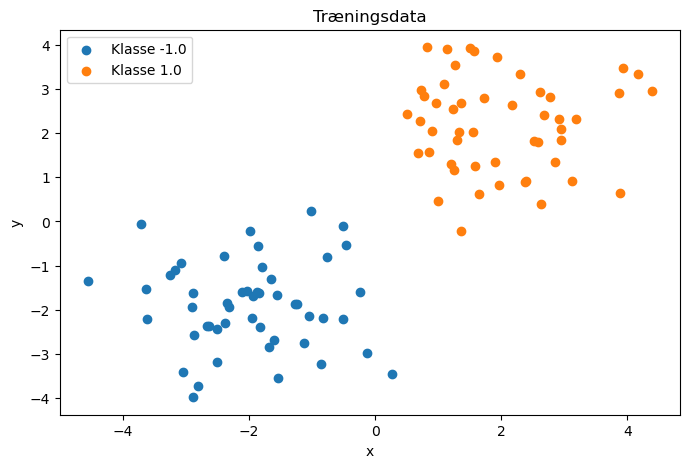

In [4]:
def plot_training_data(training_points, training_labels):
    plt.figure(figsize=(8, 5))
    # Plot punkter baseret på deres labels
    for label in np.unique(training_labels):
        # Vælg alle punkter med den aktuelle label
        subset = training_points[training_labels == label]
        plt.scatter(subset[:, 0], subset[:, 1], label=f'Klasse {label}')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Træningsdata')
    plt.show()

plot_training_data(training_points, training_labels)

In [5]:
#Her defineres den funktion der kører selve k-NN algoritmen
def knn_classify(training_points, training_labels, test_points, k=3):
    """
    training_points (np.array): (m x d)
    training_labels (np.array): (m,)
    test_points (np.array): (n x d)
    k (int): 
    """
#    m, d = training_points.shape
    n = test_points.shape[0]
    predictions = np.zeros(n)
    
    for i in range(n):
        # Beregn afstande fra testpunkt[i] til alle træningspunkter
        distances = np.linalg.norm(training_points - test_points[i], axis=1)
        # Gem indices fra de k nærmeste naboer 
        nearest_indices = np.argsort(distances)[:k]
        # Afgørelse af klasse baseret på majoritet blandt naboer 
        nearest_labels = training_labels[nearest_indices]
        values, counts = np.unique(nearest_labels, return_counts=True)
        predictions[i] = values[np.argmax(counts)]
    
    return predictions


In [6]:
#Her defineres en funktion der plotter resultaterne af k-NN algoritmen
def plot_knn_results(training_points, training_labels, test_points, predicted_labels):
    """
    training_points (np.array): Training data points
    training_labels (np.array): Training labels
    test_points (np.array): Test data points
    predicted_labels (np.array): Predicted labels for test points
    """
    plt.figure(figsize=(8, 5))
    # Plot training points
    for label in np.unique(training_labels):
        subset = training_points[training_labels == label]
        plt.scatter(subset[:, 0], subset[:, 1], label=f'Træning klasse {label}')
    # Plot test points
    for label in np.unique(predicted_labels):
        subset = test_points[predicted_labels == label]
        plt.scatter(subset[:, 0], subset[:, 1], label=f'Test klasse {label}', alpha=0.6)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('k-NN klassifikation resultater')
    plt.show()


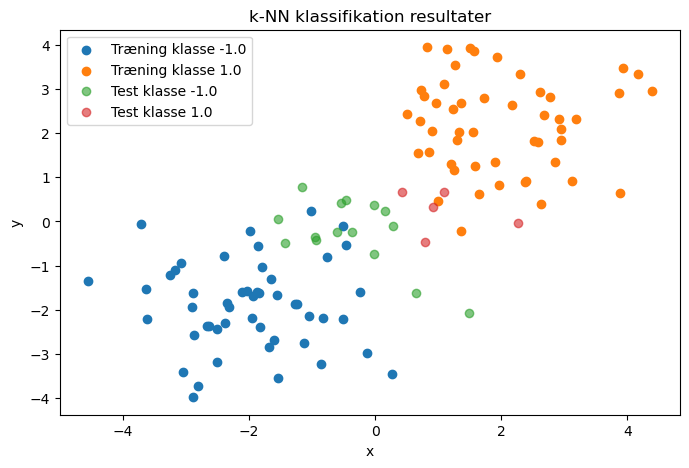

In [7]:
# Brug din k-NN funktion til at klassificere testpunkterne
predicted_labels = knn_classify(training_points, training_labels, test_points, k=5)

# Plot resultater
plot_knn_results(training_points, training_labels, test_points, predicted_labels)

#### Opgave 2

Denne opgave handler om at teste k-NN modellen af på forskellige parametre. Her kan man både prøve at teste sig egen implementation af og/eller teste den givne implementation af.

2.1: Prøv at test forskellige værdier for training_points, training_labels, test_points, predicted_labels og k. Hvad sker der når man ændre markant på nogle af disse parametre? Hvad sker der hvis vi tilføjer mange datapunkter?

2.2: Prøv at ændre på antallet af labels

2.3: Beregn error/loss osv.??? Giver dette her overhovedet mening?

#### Opgave 3

Denne opgave handler om at udvide k-NN modellen. Man kan tage udgangspunkt i sin egen implementation og/eller den givne implementation.

3.1: Prøv at tilføj flere labels, så der er flere end 2 og se hvad der sker

3.2: Prøv at udvid modellen med en dimension, så den går fra at være i 2 dimensioner til at være i 3 dimensioner. Dette kan være ens egen implementation, eller den der er givet. Print resultaterne i stedet for at plotte dem

3.3 Prøv at udvid modellen til n dimensioner

### Baseret på DRL implementation men for hele testsættet fremfor kun 1 punkt

In [8]:
def knn_all_test_points(training_points, training_labels, test_points, k=5):
    predictions = []
    errors = []
    
    for test_point in test_points:
        test_point = np.reshape(test_point, (1, -1))  # Reshape for enkeltpunkt behandling
        # Beregn afstande
        dist = np.linalg.norm(training_points - test_point, axis=1)
        sorted_indices = np.argsort(dist)
        # Majoritetsafstemning blandt de k nærmeste naboer
        nearest_labels = training_labels[sorted_indices[:k]]
        prediction = np.sign(np.sum(nearest_labels))  # Antager labels er -1 og 1
        predictions.append(prediction)
        
        # Beregn fejl
        error = (prediction != nearest_labels).mean()
        errors.append(error)

    return np.array(predictions), np.array(errors)

In [9]:
def plot_knn_classification(training_points, training_labels, test_points, predicted_labels):
    plt.figure(figsize=(10, 6))
    # Plot træningsdata
    plt.scatter(training_points[:, 0], training_points[:, 1], c=training_labels, cmap='coolwarm', alpha=0.6, edgecolors='k', label='Træningsdata')
    # Plot testdata
    plt.scatter(test_points[:, 0], test_points[:, 1], c=predicted_labels, cmap='coolwarm', alpha=1, marker='s', edgecolors='k', label='Testdata')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title('k-NN Klassifikation Resultater')
    plt.show()

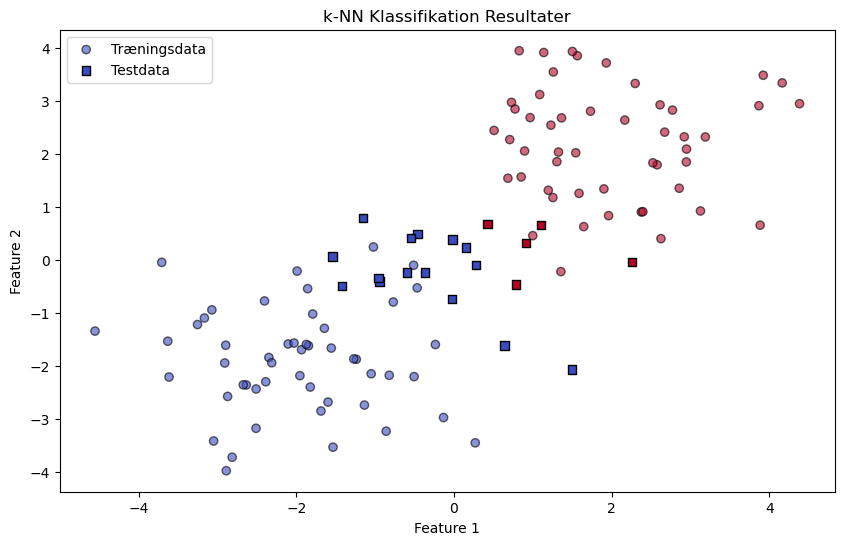

In [10]:
# Kør k-NN og få forudsigelser
predicted_labels, errors = knn_all_test_points(training_points, training_labels, test_points)

# Plot resultatet
plot_knn_classification(training_points, training_labels, test_points, predicted_labels)


### Baseret på DRL implementation men for hele testsættet fremfor kun 1 punkt 2.0

In [11]:
def knn_multiple_tests(training_points, training_labels, test_points, test_labels):
    m, d = training_points.shape
    n = test_points.shape[0]
    errors = np.zeros(n)  # Fejl for hvert testpunkt
    
    # Sikre korrekt form af training_labels
    training_labels = np.reshape(training_labels, (m, 1))
    
    for i in range(n):
        test_point = np.reshape(test_points[i], (1, d))
        test_label = np.reshape(test_labels[i], (1, 1))
        
        # Beregn afstande og sortér dem
        dist = np.linalg.norm(training_points - test_point, axis=1, keepdims=True)
        sorted_indices = np.argsort(dist, axis=0)
        
        # Kumulative forudsigelser
        predictions = np.cumsum(training_labels[sorted_indices, 0]) / np.arange(1, m + 1)
        
        # Beregn fejl for det aktuelle testpunkt
        errors[i] = np.min(abs(predictions - test_label) / 2)  # Minimum fejl over alle k
        
    return errors

In [12]:

def plot_test_results_with_errors(training_points, training_labels, test_points, errors):
    plt.figure(figsize=(10, 6))
    # Plot træningsdata
    plt.scatter(training_points[:, 0], training_points[:, 1], c=training_labels, cmap='coolwarm', alpha=0.6, label='Træningsdata')
    # Plot testdata og farvelæg efter fejl
    scatter = plt.scatter(test_points[:, 0], test_points[:, 1], c=errors, cmap='viridis', edgecolors='k', label='Testdata (fejl)')
    plt.colorbar(scatter, label='Forudsigelsesfejl')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title('Testdata og Forudsigelsesfejl')
    plt.show()

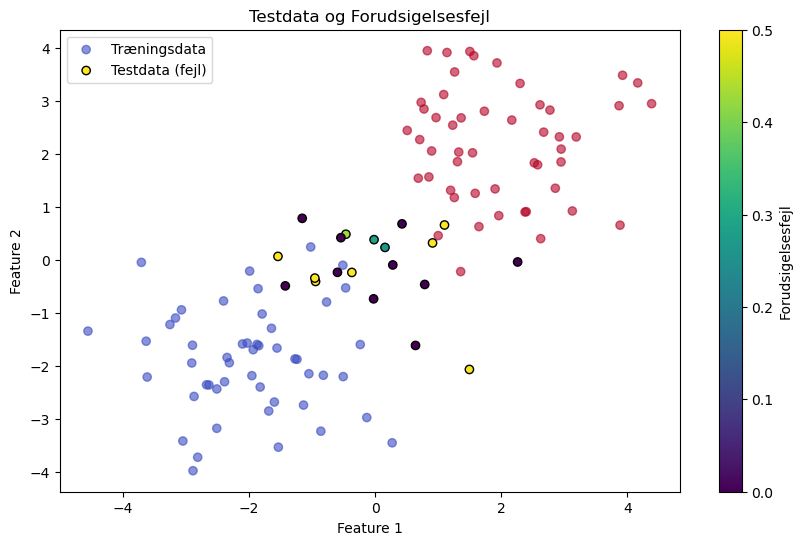

In [13]:
training_points, training_labels, test_points = generate_data()  # Tidligere defineret funktion
test_labels = np.random.choice([-1, 1], size=20)  # Generer nogle tilfældige testlabels

# Kør k-NN på hele testsættet
errors = knn_multiple_tests(training_points, training_labels, test_points, test_labels)

# Plot resultatet
plot_test_results_with_errors(training_points, training_labels, test_points, errors)


### Baseret på DRL implementation men for hele testsættet fremfor kun 1 punkt 2.1

In [14]:
def knn_predictions_and_errors(training_points, training_labels, test_points, k=5):
    m, d = training_points.shape
    n = test_points.shape[0]
    errors = np.zeros(n)
    predictions = np.zeros(n)
    
    training_labels = np.reshape(training_labels, (m, 1))
    
    for i in range(n):
        test_point = np.reshape(test_points[i], (1, d))
        dist = np.linalg.norm(training_points - test_point, axis=1, keepdims=True)
        sorted_indices = np.argsort(dist, axis=0)
        
        # Brug k nærmeste naboer for majoritetsafstemning
        nearest_labels = training_labels[sorted_indices[:k], 0]
        predicted_label = np.sign(np.sum(nearest_labels))  # Forudsig label baseret på majoritetsafstemning
        predictions[i] = predicted_label
        
        # Beregn fejl for det aktuelle testpunkt
        actual_label = test_point[0]  # Antag at dette er den faktiske label, rettes til din faktiske struktur
        errors[i] = np.min(abs(nearest_labels - actual_label) / 2)  # Minimum fejl over alle k

    return predictions, errors


In [15]:
def plot_predictions_vs_actual(training_points, training_labels, test_points, test_labels, predicted_labels):
    plt.figure(figsize=(10, 6))
    # Plot træningsdata
    plt.scatter(training_points[:, 0], training_points[:, 1], c=training_labels, cmap='coolwarm', alpha=0.6, label='Træningsdata', edgecolors='k')
    # Plot testdata og forudsigelser
    for i in range(len(test_points)):
        plt.scatter(test_points[i, 0], test_points[i, 1], color='green', label='Test Data' if i == 0 else "", s=100, alpha=0.75)
        plt.scatter(test_points[i, 0], test_points[i, 1], color='red', marker='x', label='Prediction' if i == 0 else "", s=100)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title('Testdata vs Forudsigelser')
    plt.show()


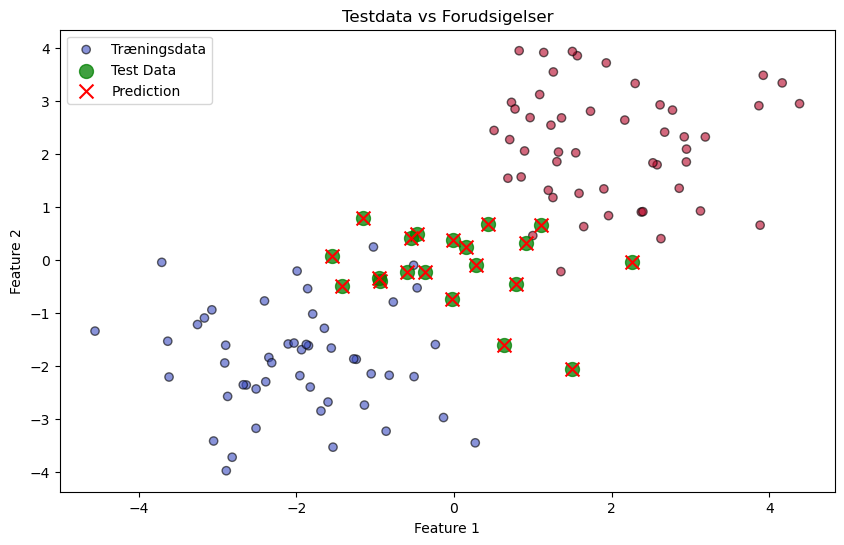

In [16]:
# Generer data
training_points, training_labels, test_points = generate_data()  # Brug din tidligere definerede funktion
test_labels = np.random.choice([-1, 1], size=20)  # Generer tilfældige testlabels

# Kør k-NN og få både forudsigelser og fejl
predicted_labels, errors = knn_predictions_and_errors(training_points, training_labels, test_points)

# Plot resultaterne
plot_predictions_vs_actual(training_points, training_labels, test_points, test_labels, predicted_labels)


### DRL implementation

In [17]:
np.random.seed(0)
# 10 punkter, 2 dimensioner hver
training_points = np.random.randn(10, 2)
# Binære labels
training_labels = np.array([1, 1, -1, -1, 1, -1, 1, -1, 1, -1])
# Et testpunkt
test_point = np.random.randn(1, 2)
# Antag at den sande label er 1
test_label = np.array([1])  

In [18]:
def knn(training_points,training_labels,test_point,test_label):
    """
    training_points: m x d vector
    training_labels: m vector (1,-1)
    test_point: d vector 
    test_label: 1 vector (1,-1)
    """ 
    m,d = training_points.shape
    # Reshape to prevent broadcasting errors
    training_labels = np.reshape(training_labels,(-1,1)) # m x 1
    test_point = np.reshape(test_point, (1,-1)) # 1 x d
    test_label = np.reshape(test_label, (1,1))

    assert(training_labels.shape == (m,1))
    assert(test_point.shape == (1,d))
    assert(test_label.shape == (1,1))

    dist = np.linalg.norm(training_points - test_point,axis=1,keepdims=True)
    assert(dist.shape == (m,1))

    sorted_indices = np.argsort(dist,axis=0)

    predictions = np.cumsum(training_labels[sorted_indices,0]) / np.arange(1,m+1)
    error = abs(predictions-test_label)/2

    return error

In [19]:
error = knn(training_points, training_labels, test_point, test_label)
print("Forudsigelsesfejl:", error)

Forudsigelsesfejl: [[0.         0.5        0.66666667 0.75       0.6        0.66666667
  0.57142857 0.5        0.44444444 0.5       ]]


In [20]:
# def knn_modified(training_points, training_labels, test_point, test_label, k=5):
#     m, d = training_points.shape
#     training_labels = np.reshape(training_labels, (-1, 1))
#     test_point = np.reshape(test_point, (1, -1))
#     test_label = np.reshape(test_label, (1, 1))

#     # Beregn afstande og sortér dem
#     dist = np.linalg.norm(training_points - test_point, axis=1, keepdims=True)
#     sorted_indices = np.argsort(dist, axis=0)

#     # Vælg de k nærmeste naboers labels og udfør majoritetsafstemning
#     nearest_labels = training_labels[sorted_indices[:k], 0]
#     prediction = np.sign(np.sum(nearest_labels))  # Antager labels er -1 og 1
#     error = np.mean(abs(nearest_labels - test_label)) / 2

#     return prediction, error

# # Eksempel på brug
# test_point = np.random.randn(1, 2)  # Et tilfældigt testpunkt
# test_label = np.array([1])  # Antagelse af testlabel
# prediction, error = knn_modified(training_points, training_labels, test_point, test_label)
# print("Forudsigelse:", prediction)
# print("Forudsigelsesfejl:", error)

In [21]:
# def plot_knn_results_with_test_point(training_points, training_labels, test_point, prediction):
#     plt.figure(figsize=(8, 5))
#     plt.scatter(training_points[:, 0], training_points[:, 1], c=training_labels, cmap='coolwarm', label='Træningsdata')
#     plt.scatter(test_point[0, 0], test_point[0, 1], color='green' if prediction == 1 else 'red', edgecolors='k', s=100, label='Testpunkt (Forudsigelse)')
#     plt.xlabel('Feature 1')
#     plt.ylabel('Feature 2')
#     plt.legend()
#     plt.title('k-NN Klassifikation med Testpunkt')
#     plt.show()

# plot_knn_results_with_test_point(training_points, training_labels, test_point, prediction)

### Implementation fra nettet med pakker

In [22]:
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [23]:
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

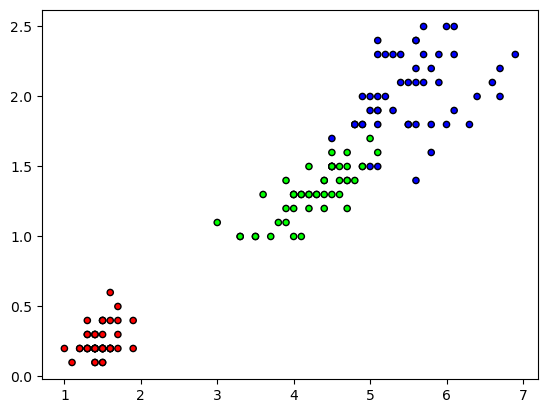

[1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0]
0.9666666666666667


In [24]:
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

plt.figure()
plt.scatter(X[:,2],X[:,3], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()


clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(predictions)

acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

In [25]:
# #Her kan man printe og plotte datasættet

# #print(training_points)
# plt.scatter(training_points[:,0], training_points[:,1]);
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.title('Træningsdata')
# plt.show()